In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import time
import re
start_time=time.time()
%matplotlib inline

<h1 align=center> Train Dataset Preparation </h1>

In [2]:
#edo vazoume to proto etsi gia na kseziparoume mono ta train files
import zipfile
archive = zipfile.ZipFile('C:/Users/karvo/Desktop/aueb/computational statistics and machine learning/Project/mnistdata.zip')
for file in archive.namelist():
    if file.startswith('train'):
        archive.extract(file)

In [4]:
#edo ginetai to ntaraveri to kalo.
start_time_1=time.time()
rows=[]
train_lengths=[]
for i in range(0,10):
    #mpainoun ta panta grammi grammi apo ola ta files
    with open('train'+str(i)+'.txt') as f:
        rows.append(f.readlines())
    for j in range(0,len(rows[i])):
        #dioxnoume ta \n
        rows[i][j]=rows[i][j][:-1]
        #kratame mono ta integers
        rows[i][j]=[*map(int, rows[i][j].split())]
        #ta kanoume kai np.arrays gia na mas volepsei me to plot
        rows[i][j]=np.array(rows[i][j], dtype='uint8')
    #edo tou apothikeuo poso mikos exei kathe txt diladi poses eikones periexei gia na exoume kai ta sosta labels
    train_lengths.append(len(rows[i]))
#ksediplono tin nested lista gia na exoume se kathe grammi mia eikona        
train_data=[item for sublist in rows for item in sublist]

elapsed_time_1=time.time()-start_time_1 
#ola auta ston mageutiko xrono tou enos leptou kai kati sec
time.strftime("%H:%M:%S", time.gmtime(elapsed_time_1))

'00:00:14'

In [5]:
#edo vlepoume poses eikones apo tin kathe klasi fortosame
train_lengths

[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]

In [6]:
#edo tsekaroume ean mas efyge kamia eikona (einai ontos 60K)
len(train_data)

60000

In [8]:
def visualization(aux0):
    pixels = aux0.reshape((28, 28))
    plt.imshow(pixels, cmap='gray')
    plt.show()

In [15]:
len(train_data[65])

784

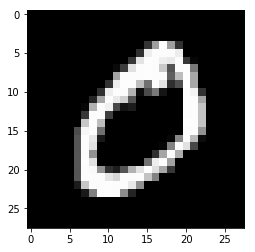

In [17]:
visualization(train_data[0])

In [39]:
import itertools
train_labels=[]
for i in range(0,len(train_lengths)):
    train_labels+=list(itertools.repeat(0+i,train_lengths[i]))
#h parakato grammi einai optional ean thelo na kano ta labels strings gia na min mpleksoume me ta noumera pou antiprosopeuoun
#train_labels=list(map(str, train_labels))

#######################
labeled_train_data=pd.Series(train_data,index=[train_labels])
#####################
#auti poia mas dinei oles tis grammes me index 5
labeled_train_data[5]
#eno auti mas dinei tin 5h eikona
labeled_train_data.iloc[5];

In [51]:
labeled_train_data[5]

5    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
5    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
5    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
5    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
5    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
5    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
5    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
5    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
5    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
5    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
5    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
5    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
5    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
5    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
5    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
5    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
5    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
5    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
5    [0, 0

In [98]:
labeled_train_data.iloc[5922:10000].values

array([ array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   7,  88, 133,
       133, 226, 214,  25,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 145,
       253, 253, 253, 253, 253, 212,  94,  13,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,

In [104]:
labeled_train_data.index

Int64Index([0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
            ...
            9, 9, 9, 9, 9, 9, 9, 9, 9, 9],
           dtype='int64', length=60000)

<h1 align=center> Test Dataset Preparation </h1>

In [134]:
import zipfile
archive = zipfile.ZipFile('C:/Users/karvo/Desktop/aueb/computational statistics and machine learning/Project/mnistdata.zip')
for file in archive.namelist():
    if file.startswith('test'):
        archive.extract(file)

In [144]:
start_time_2=time.time()
rows=[]
test_lengths=[]
for i in range(0,10):
    with open('test'+str(i)+'.txt') as f:
        rows.append(f.readlines())
    for j in range(0,len(rows[i])):
        rows[i][j]=rows[i][j][:-1]
        rows[i][j]=[*map(int, rows[i][j].split())]
        rows[i][j]=np.array(rows[i][j], dtype='uint8')
    test_lengths.append(len(rows[i]))
test_data=[item for sublist in rows for item in sublist]
elapsed_time_2=time.time()-start_time_2 
#ola auta ston mageutiko xrono ton <15 sec
time.strftime("%H:%M:%S", time.gmtime(elapsed_time_2))

'00:00:02'

In [145]:
test_lengths

[980, 1135, 1032, 1010, 982, 892, 958, 1028, 974, 1009]

In [147]:
import itertools
test_labels=[]
for i in range(0,len(test_lengths)):
    test_labels+=list(itertools.repeat(0+i,test_lengths[i]))
labeled_test_data=pd.Series(test_data,index=[test_labels])

# Neural Net

## Toy

In [142]:
from sklearn.neural_network import MLPClassifier
X = [[0., 0.], [1., 1.]]
y = [0, 1]
clf = MLPClassifier(solver='sgd', alpha=0,activation='tanh',learning_rate='invscaling',
                    hidden_layer_sizes=(5,))
clf.fit(X, y)
clf.predict([[2., 2.], [-1., -2.]])

array([1, 1])

## MNIST data

In [148]:
X=list(labeled_train_data.values)
y=list(labeled_train_data.index)
clf=MLPClassifier(solver='sgd', alpha=0,activation='tanh',learning_rate='invscaling',
                   hidden_layer_sizes=(5,),max_iter=1000,shuffle=True)
clf.fit(X,y)

MLPClassifier(activation='tanh', alpha=0, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(5,), learning_rate='invscaling',
       learning_rate_init=0.001, max_iter=1000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='sgd', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [125]:
clf.coefs_[1]

array([[ 0.28367634,  0.68623187, -0.01205698, -0.30420668, -0.26155687,
         0.07233317,  0.51002186,  0.15268448,  0.35239643, -0.46656943],
       [-0.75760822, -0.04291594, -0.30410899, -0.62550106, -0.34740835,
         0.39901472,  0.43110004,  0.37921042, -0.3517176 ,  0.26222565],
       [-0.14946253, -0.0270653 ,  0.25816081, -0.36061202, -0.32047496,
        -0.44350337,  0.70917869, -0.60418587, -0.19996117, -0.26491085],
       [ 0.20285789, -0.44354447,  0.56237049,  0.53000547,  0.27994818,
         0.28831206,  0.58529363, -0.59433386, -0.51044295, -0.58810457],
       [ 0.67814046, -0.55913707, -0.12620476, -0.23025498, -0.66937918,
         0.02194369,  0.41495057,  0.3959157 , -0.00673307,  0.24502704]])

In [132]:
clf.predict(test_data[0:25])

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0,
       0, 0], dtype=int64)

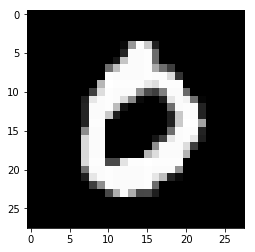

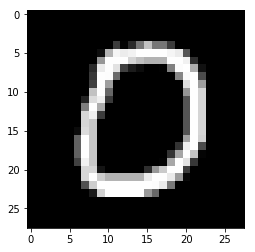

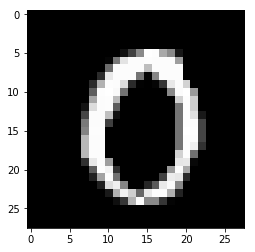

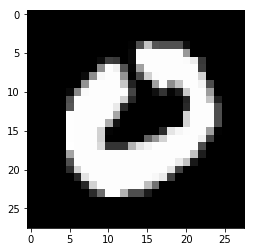

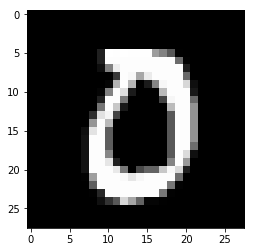

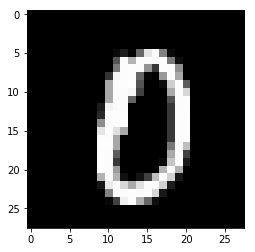

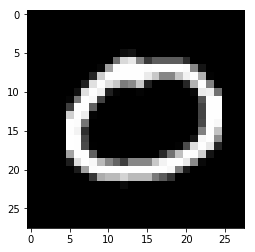

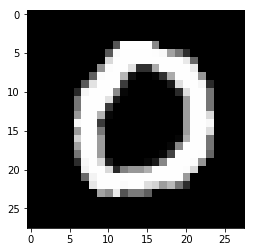

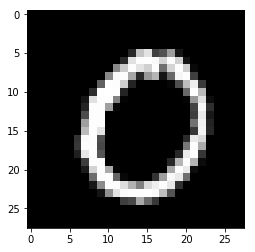

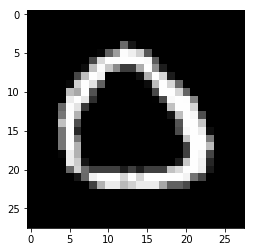

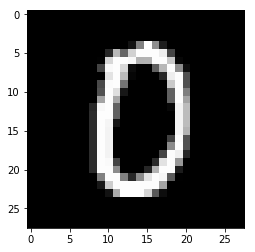

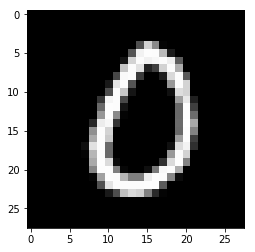

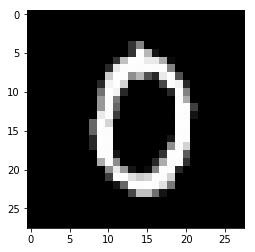

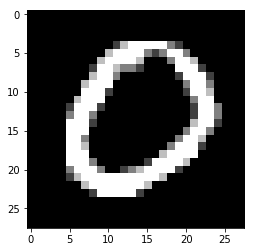

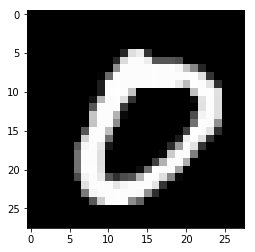

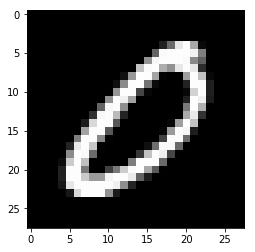

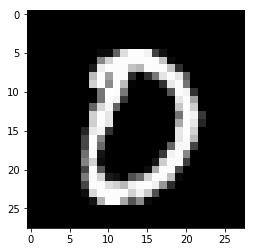

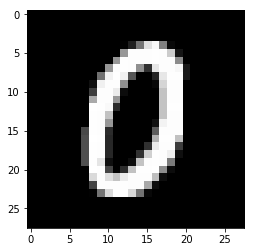

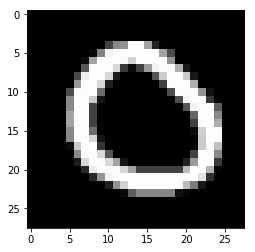

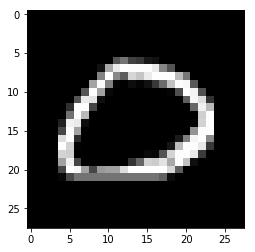

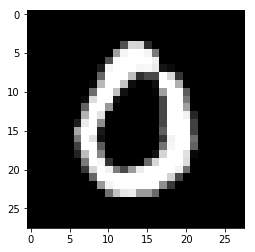

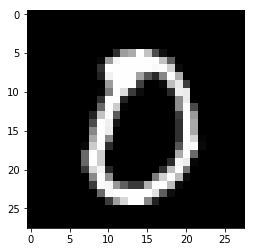

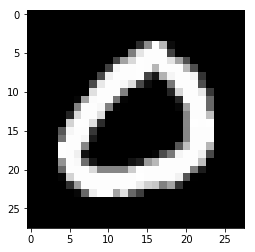

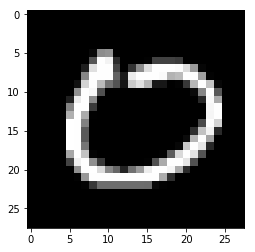

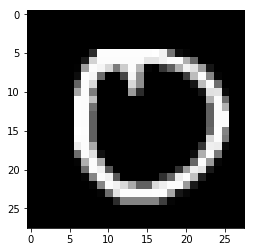

In [141]:
for i in range(25):
    visualization(test_data[i])



<h1 align=center> Test Dataset Preparation </h1>